### File to prepare number count maps of different galaxy types at various resolutions

Todo:

1. Remove LMC
2. Generate Maps of LRG, ELG, QSO in North and South
3. Generate Maps of Targets and of Predicted number of galaxies
4. Generate Maps at 256 and at 2048
5. Export Maps

write_map(filename, m[, nest, dtype, …])

In [10]:
import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Generating Target Maps at NSIDE 256

In [11]:
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)


In [ ]:
df_north = pd.read_csv('../models/regression/results/north_complete.csv')
df_south = pd.read_csv('../models/regression/results/south_complete.csv')
df_des = pd.read_csv('../models/regression/results/des_complete.csv')
df_north.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)
df_south.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)
df_des.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)


In [7]:
df_north.describe()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,seeing_z,lrg_lin,elg_lin,qso_lin,lrg_nn,elg_nn,qso_nn,lrg_deep,elg_deep,qso_deep
count,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,...,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000
mean,92727.060372,35.284242,124.994093,153.217953,0.241254,0.138893,0.133994,0.189980,0.760625,0.621835,...,0.085072,35.293191,124.979752,153.171268,35.739790,126.762165,152.808610,35.391083,125.250448,151.974754
std,52362.454442,11.989440,22.236808,28.685116,0.116953,0.130899,0.127760,0.173179,0.097261,0.090132,...,0.035446,1.773044,8.916475,8.909811,1.791899,9.452861,10.061837,1.772205,10.721035,10.901988
min,1672.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,30.459739,64.411747,96.609871,24.010534,0.000000,44.175816,24.518848,-16.683737,33.930271
25%,47548.750000,27.000000,111.000000,134.000000,0.181818,0.058577,0.049275,0.048089,0.717936,0.574291,...,0.061880,34.213938,120.735014,147.685293,34.482845,121.955553,146.828365,34.250332,120.748043,142.898087
50%,91531.500000,34.000000,125.000000,152.000000,0.209790,0.087866,0.083369,0.133068,0.777146,0.635936,...,0.080584,34.750888,125.910090,153.254823,35.118738,127.105034,153.157562,34.913462,126.001419,150.590439
75%,137463.250000,41.000000,139.000000,171.000000,0.244755,0.167364,0.177345,0.279442,0.828575,0.682960,...,0.102415,35.933562,130.341464,159.073430,36.766582,131.997932,160.448380,36.273582,131.360260,161.701023
max,186645.000000,131.000000,285.000000,334.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,45.856045,204.662816,197.639034,44.132565,168.240814,181.350739,44.580502,191.120193,185.263977


In [28]:
pdList = [df_south, df_north, df_des]  # List of your dataframes
df = pd.concat(pdList)

df.describe()


print(len(df.pixel_id))
df = df.drop_duplicates(subset=['pixel_id'], keep=False)
print(len(df.pixel_id))

369800
356954


In [37]:
m_LRG = np.zeros(NPIX)

m_LRG[df.pixel_id.to_numpy()] = df.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan

hp.write_map("number_count_maps/LRG_gold_256.fits", m_LRG, overwrite=True)

setting the output map dtype to [dtype('float64')]


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


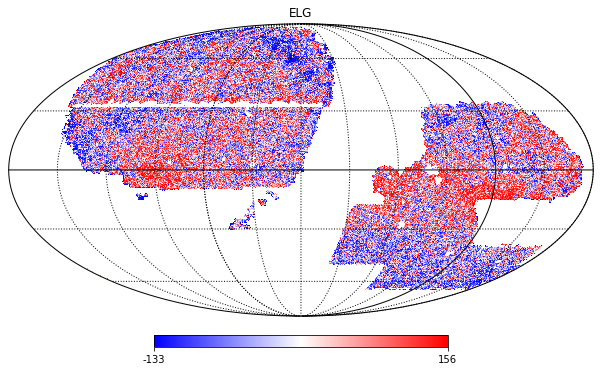

In [38]:
m_ELG = np.zeros(NPIX)

m_ELG[df.pixel_id.to_numpy()] = df.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/ELG_gold_256.fits", m_ELG, overwrite=True)


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


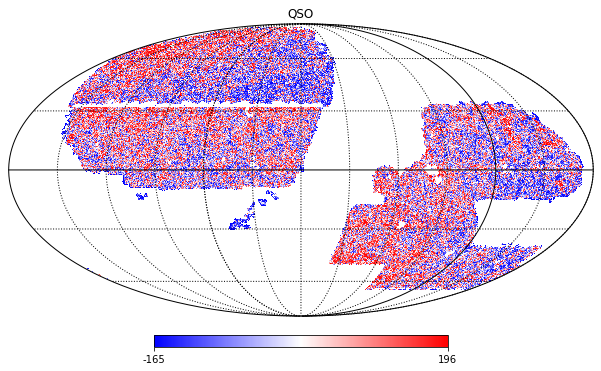

In [39]:
m_QSO = np.zeros(NPIX)

m_QSO[df.pixel_id.to_numpy()] = df.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/QSO_gold_256.fits", m_QSO, overwrite=True)

In [32]:
print(df.columns)

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_nn', 'elg_nn', 'qso_nn', 'lrg_deep', 'elg_deep', 'qso_deep'],
      dtype='object')


### Visualising a map

In [ ]:
m_LRG = hp.read_map("number_count_maps/LRG_gold_256.fits")
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
